# TNE 2: Principal Component Analysis

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy import linalg as la

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [2]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

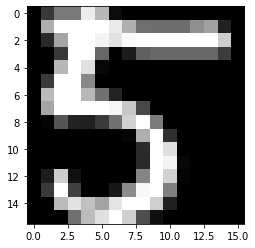

In [3]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))
plt.imshow(I,cmap='gray')
plt.show()

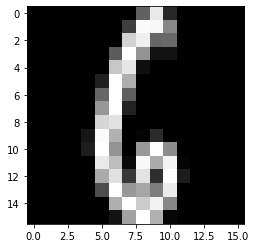

In [4]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))
plt.imshow(I,cmap='gray')
plt.show()

#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [5]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5



x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

class_test = np.ones((875,1))   # label 1 for digit 6
class_test[:411] = 0 


## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [6]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(x_train_centre)  # computes the projection coefficients

### Display the averaged images of 5 & 6 respectively

In [7]:
pca = PCA()
pca.fit(x_train_centre)

PCA()

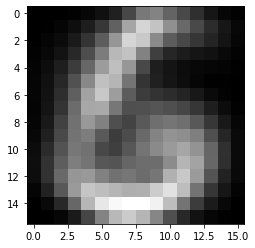

In [8]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.imshow(I_moy,cmap = 'gray')
plt.show()

### Display an example rebuilt from the 1st component only

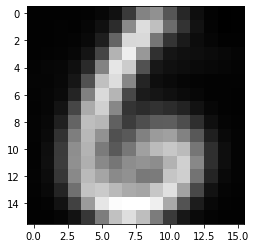

In [9]:
n=12   # choice of image no n=12 or any other

I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))  # adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.
2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.
3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?
4. Optional question: do the same for 6.


In [10]:
print(pca.__doc__)
# import webbrowser
# webbrowser.open("https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html")

Principal component analysis (PCA).

    Linear dimensionality reduction using Singular Value Decomposition of the
    data to project it to a lower dimensional space. The input data is centered
    but not scaled for each feature before applying the SVD.

    It uses the LAPACK implementation of the full SVD or a randomized truncated
    SVD by the method of Halko et al. 2009, depending on the shape of the input
    data and the number of components to extract.

    It can also use the scipy.sparse.linalg ARPACK implementation of the
    truncated SVD.

    Notice that this class does not support sparse input. See
    :class:`TruncatedSVD` for an alternative with sparse data.

    Read more in the :ref:`User Guide <PCA>`.

    Parameters
    ----------
    n_components : int, float or 'mle', default=None
        Number of components to keep.
        if n_components is not set all components are kept::

            n_components == min(n_samples, n_features)

        If ``n_components =

En entrée, on a besoin d'un array de la taille ($n_{samples}$, $n_{features}$)\
En sortie, on a les matrices $U, \Sigma$ et $V^H$, qui proviennent de la décomposition $\textit{SVD}$ avec $\Sigma$ comprenant les valeurs singulières et $U$ les directions des composantes principales. 

In [11]:
x_train_standardized = x_train_centre  

## Avec les 5

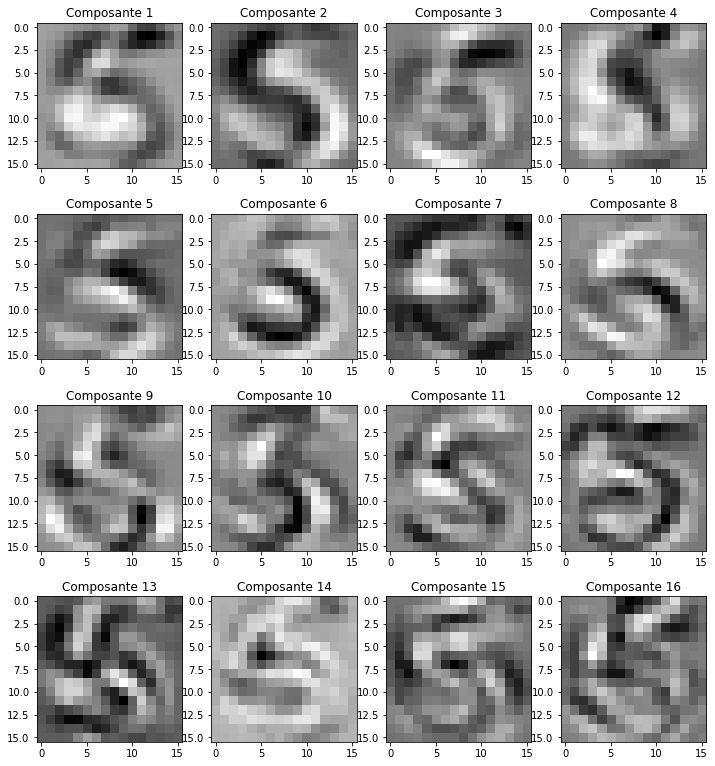

In [12]:
U, S, VH = la.svd(x_train_standardized[:145].T)
V = VH.T
columns = 4
nb_image = 16
plt.figure(figsize=(12,17))
for i in range(nb_image):
    
    plt.subplot(int(nb_image/ columns + 1), columns, i + 1)
    plt.title(f"Composante {i+1}")
    plt.imshow(np.reshape(U.T[i],(16,16)),cmap='gray')


U est une matrice de changement de base. On visualise au-dessus les premiers vecteurs de cette base. On remarque que ces vecteurs une fois "affichés" sous forme d'image sont interprétables : ils représentent des formes de 5. C'est normal car cette base est censé représenter une projection sur un espace qui caractérise l'image "5".

Pour minimiser l'erreur entre l'entrée $x$ et $x_{app}$, on cherche les vecteurs propres de $XX^{T}$ et on projette dans les directions des m-plus grands vecteurs propres.

Les variances sont conservées à 90.0 % dès qu'on a au moins 32 composants
Les variances sont conservées à 95.0 % dès qu'on a au moins 50 composants
Les variances sont conservées à 99.0 % dès qu'on a au moins 89 composants


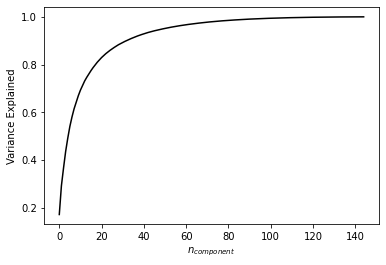

In [13]:
Variance_Explained5 = np.cumsum(S**2)/np.sum(S**2)
plt.plot(Variance_Explained5,color="black")
# plt.style.use("ggplot")
plt.xlabel("$n_{component}$")
plt.ylabel("Variance Explained")
p=0.90
p_nice=0.95
p_very_nice=0.99
print(f"Les variances sont conservées à {p*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained5>=p) )} composants")
print(f"Les variances sont conservées à {p_nice*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained5>=p_nice) )} composants")
print(f"Les variances sont conservées à {p_very_nice*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained5>=p_very_nice) )} composants")

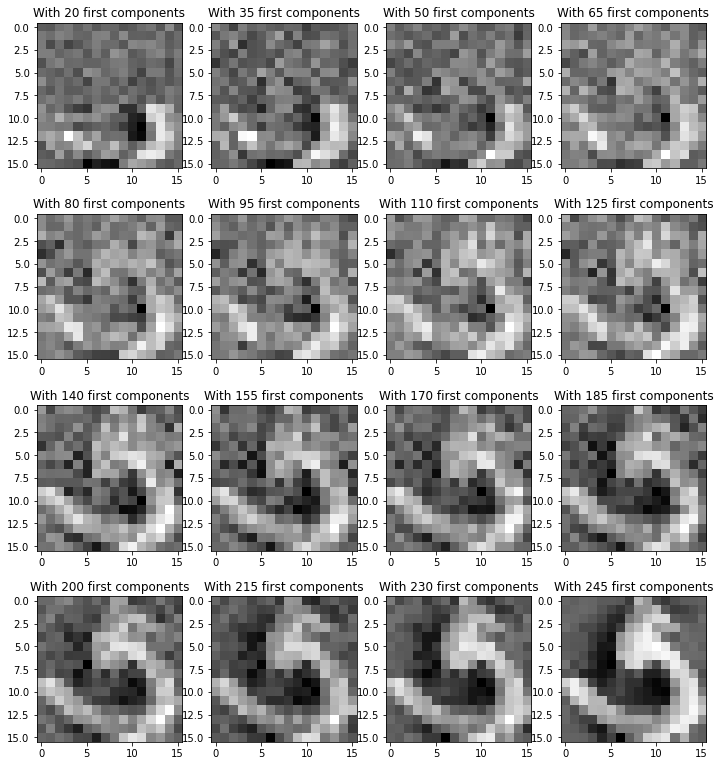

In [14]:
num_image = 64

columns = 4
nb_image = 16
plt.figure(figsize=(12,17))


for _,i in enumerate(range(20,260,250//nb_image)):
    plt.subplot(int(nb_image/ columns + 1), columns, _ + 1)
    
    z =  U @ x_train_standardized[num_image]
    z[i:]=0
    x_app =  U.T @z 
    plt.title(f"With {i} first components")
    plt.imshow(np.reshape(x_app,(16,16)),cmap='gray')

## Avec les 6

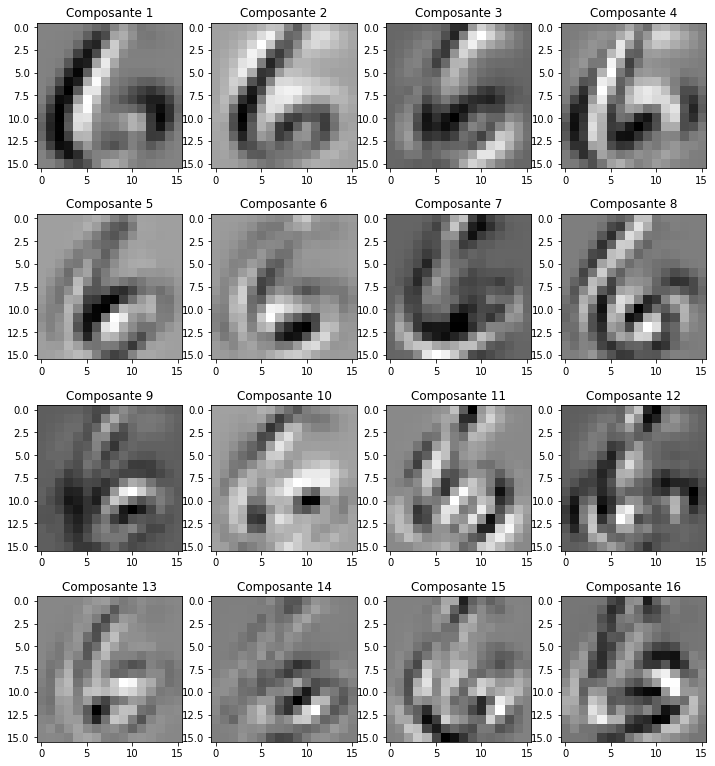

In [15]:
U, S_6, VH = la.svd(x_train_standardized[145:].T)
V = VH.T
columns = 4
nb_image = 16
plt.figure(figsize=(12,17))
for i in range(nb_image):
    
    plt.subplot(int(nb_image/ columns + 1), columns, i + 1)
    plt.title(f"Composante {i+1}")
    plt.imshow(np.reshape(U.T[i],(16,16)),cmap='gray')

Les variances sont conservées à 90.0 % dès qu'on a au moins 28 composants
Les variances sont conservées à 95.0 % dès qu'on a au moins 43 composants
Les variances sont conservées à 99.0 % dès qu'on a au moins 84 composants


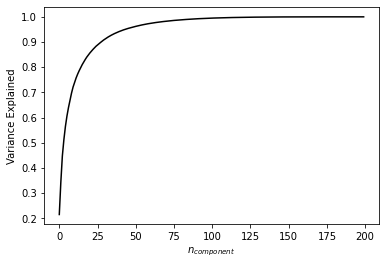

In [16]:
Variance_Explained6 = np.cumsum(S_6**2)/np.sum(S_6**2)
plt.plot(Variance_Explained6,color="black")
# plt.style.use("ggplot")
plt.xlabel("$n_{component}$")
plt.ylabel("Variance Explained")
p=0.90
p_nice=0.95
p_very_nice=0.99
print(f"Les variances sont conservées à {p*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained6>=p) )} composants")
print(f"Les variances sont conservées à {p_nice*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained6>=p_nice) )} composants")
print(f"Les variances sont conservées à {p_very_nice*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained6>=p_very_nice) )} composants")

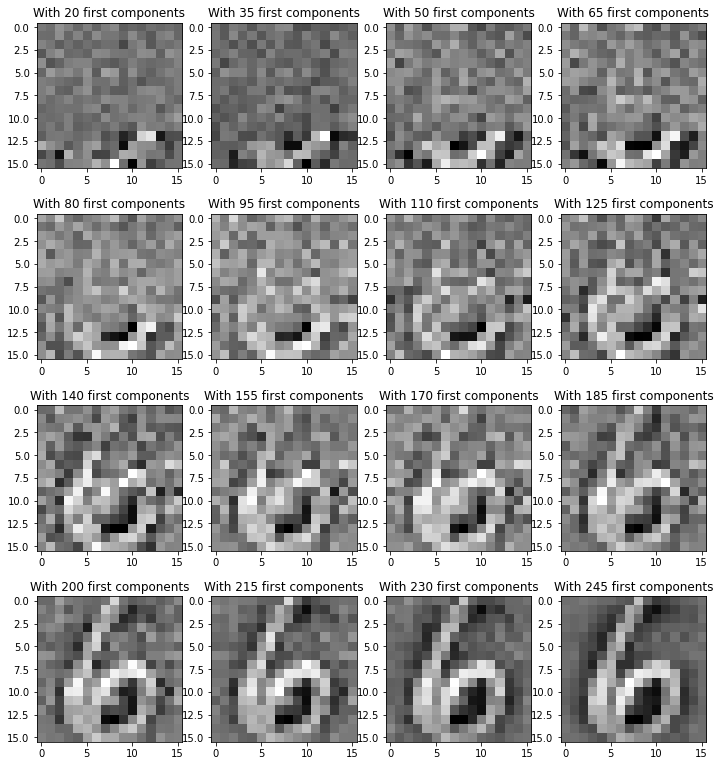

In [17]:
num_image = 250

columns = 4
nb_image = 16
plt.figure(figsize=(12,17))


for _,i in enumerate(range(20,260,250//nb_image)):
    plt.subplot(int(nb_image/ columns + 1), columns, _ + 1)
    
    z =  U @ x_train_standardized[num_image]
    z[i:]=0
    x_app =  U.T @z 
    plt.title(f"With {i} first components")
    plt.imshow(np.reshape(x_app,(16,16)),cmap='gray')

# Avec les 6 et les 5

Nous allons vérifier le lien entre la décomposition en valeurs singulières et la matrice de covariance.
En théorie :
 Les valeurs propres de $XX^{T}$ sont égales à celles de $\Sigma$ au carré
 -->  X étant supposé centré réduit, la matrice de covariance est égale à $XX^{T}$

0.7841104297416516

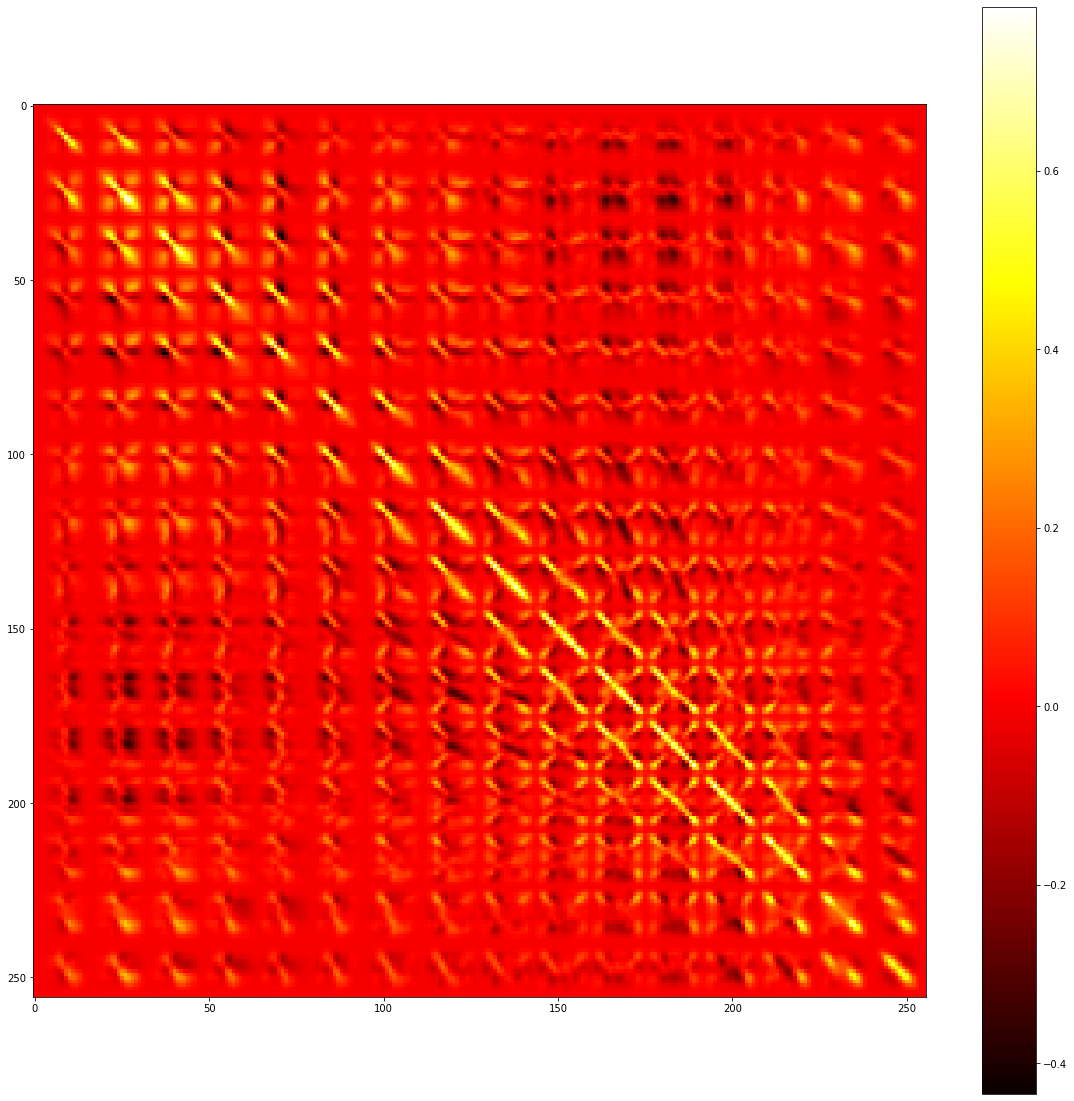

In [18]:
Cov = np.cov(x_train_standardized.T,bias=True)
plt.figure(figsize=(20,20))
plt.imshow(Cov,cmap="hot")
plt.colorbar()
np.max(Cov)

Les zones fortement corrélées en dehors de la diagonales sont expliquables par le fait suivant : 

Dans l'image les pixels voisins sont forcément corrélés à cause du flou de l'image (l'image n'est pas parfaitement nette, les teintes de noir ne tiennent pas que sur un pixel et débordent sur les voisins). On voit donc sur la matrice de covariance un écart constant de 16 pixels (saut d'une ligne sur l'image).
Il est donc difficile d'interpréter les corrélations entre attributs car certaines sont dues au bruit de l'image elle même.

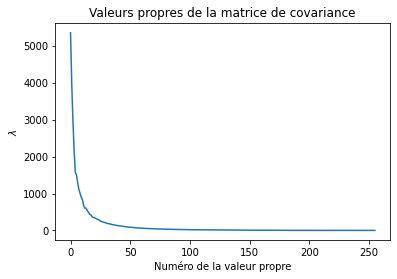

In [19]:
diagCov = np.flip(np.sort(la.eigvals(x_train_standardized.T@x_train_standardized)))
D = np.zeros((256,256))
np.fill_diagonal(D,diagCov)

plt.figure()
plt.plot(diagCov)
plt.title("Valeurs propres de la matrice de covariance")
plt.xlabel("Numéro de la valeur propre")
plt.ylabel("$\lambda$")
plt.show()
#plt.imshow(D) # Matrice de covariance diagonalisée

Calcul des valeurs propres de $\Sigma$

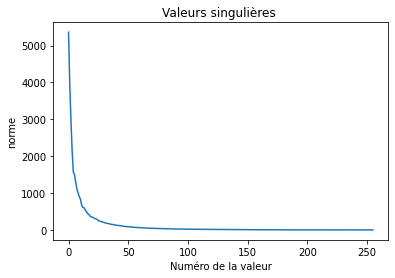

In [20]:
U, S, VH = la.svd(x_train_standardized.T)
plt.figure()
plt.plot(S**2)
plt.title("Valeurs singulières ")
plt.xlabel("Numéro de la valeur")
plt.ylabel("norme")
plt.show()


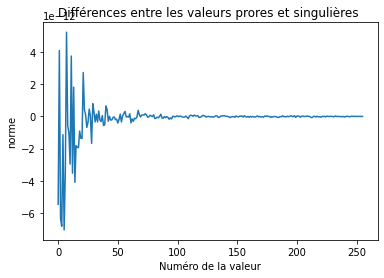

In [21]:
plt.figure()
plt.plot(S**2 - diagCov )
plt.title("Différences entre les valeurs prores et singulières ")
plt.xlabel("Numéro de la valeur")
plt.ylabel("norme")
plt.show()

On remarque que les valeurs propres sont les mêmes, l'erreur de l'ordre de $10^{-12}$ est causé par des approximations informatiques.

Cependant la différence entre ces deux façons de les calculer est la complexité :
$O(ND^{2})$ pour la covariance
$O(NDM)$ pour la SVD

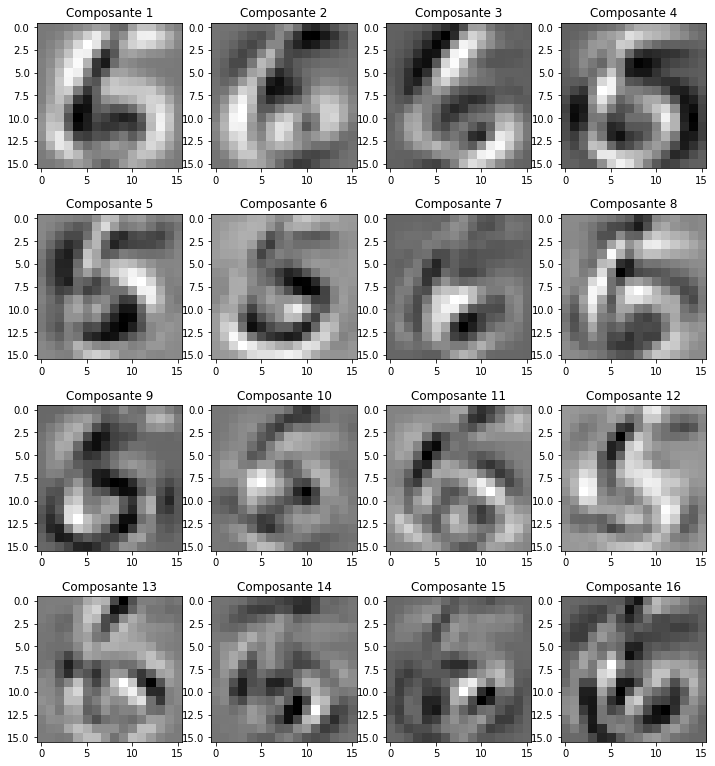

In [22]:
V = VH.T
columns = 4
nb_image = 16
plt.figure(figsize=(12,17))
for i in range(nb_image):
    
    plt.subplot(int(nb_image/ columns + 1), columns, i + 1)
    plt.title(f"Composante {i+1}")
    plt.imshow(np.reshape(U.T[i],(16,16)),cmap='gray')

Les variances sont conservées à 90.0 % dès qu'on a au moins 43 composants
Les variances sont conservées à 95.0 % dès qu'on a au moins 67 composants
Les variances sont conservées à 99.0 % dès qu'on a au moins 126 composants


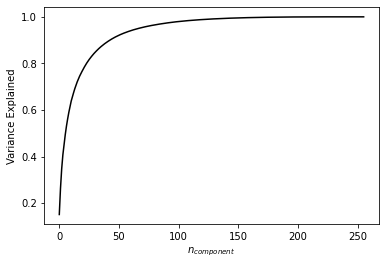

In [23]:
Variance_Explained_5et6 = np.cumsum(S**2)/np.sum(S**2)
plt.plot(Variance_Explained_5et6,color="black")
# plt.style.use("ggplot")
plt.xlabel("$n_{component}$")
plt.ylabel("Variance Explained")
p=0.90
p_nice=0.95
p_very_nice=0.99
print(f"Les variances sont conservées à {p*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained_5et6>=p) )} composants")
print(f"Les variances sont conservées à {p_nice*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained_5et6>=p_nice) )} composants")
print(f"Les variances sont conservées à {p_very_nice*100} % dès qu'on a au moins {np.min(np.argwhere(Variance_Explained_5et6>=p_very_nice) )} composants")

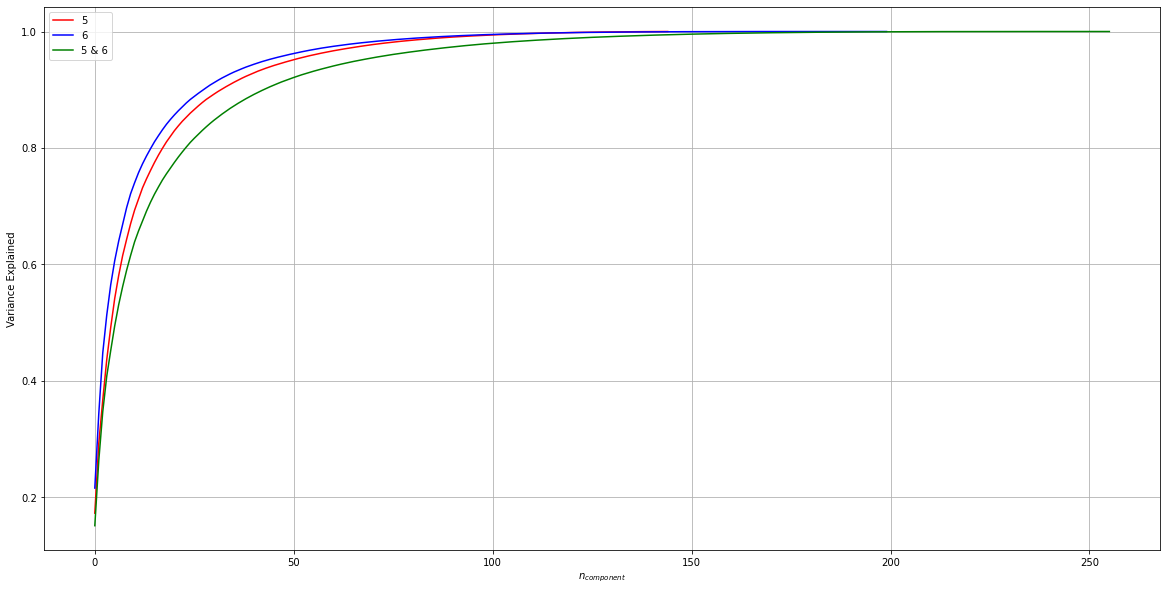

In [24]:
plt.figure(figsize=(20,10))
plt.plot(Variance_Explained5,color="red",label="5")
plt.plot(Variance_Explained6,color="blue",label="6")
plt.plot(Variance_Explained_5et6,color="green",label="5 & 6")
plt.xlabel("$n_{component}$")
plt.ylabel("Variance Explained")
plt.legend()
plt.grid()
plt.show()

On remarque que la courbe du 6 est au dessous de la courbe du 5 qui est au dessus de la courbe des variances expliquées des deux. Ainsi, on en déduit qu'il faudra garder moins de composantes pour le 6 que pour le 5 (et biensur pour les deux à la fois) pour conserver un même taux de variances expliquées. 6 se distingue mieux que 5.

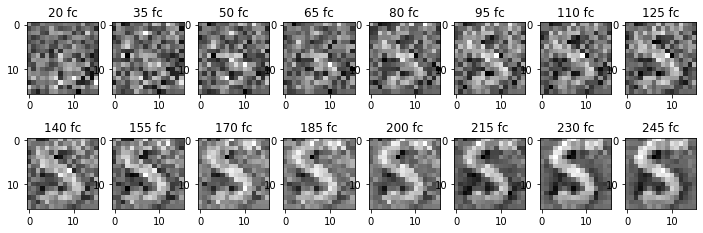

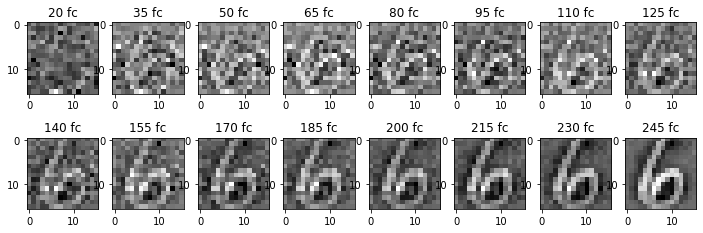

In [25]:
num_image = 3

columns = 8
nb_image = 16
plt.figure(figsize=(12,6))


for _,i in enumerate(range(20,260,250//nb_image)):
    plt.subplot(int(nb_image/ columns + 1), columns, _ + 1)
    
    z =  U @ x_train_standardized[num_image]
    z[i:]=0
    x_app =  U.T @z 
    plt.title(f"{i} fc")
    plt.imshow(np.reshape(x_app,(16,16)),cmap='gray')
plt.show()
num_image = 250
plt.figure(figsize=(12,6))
print("\n\n\n")

for _,i in enumerate(range(20,260,250//nb_image)):
    plt.subplot(int(nb_image/ columns + 1), columns, _ + 1)
    
    z =  U @ x_train_standardized[num_image]
    z[i:]=0
    x_app =  U.T @z 
    plt.title(f"{i} fc")
    plt.imshow(np.reshape(x_app,(16,16)),cmap='gray')

# Question 3

Qualitativement, on a besoin d'entre 110 et 155 composants pour observer le chiffre 5 ou 6.
En suivant le critère de précision d'au moins 95%, 66 composantes principales devraient suffire.


### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


In [26]:
U_t, S_t, VH_t = la.svd(x_train_standardized.T)
Z =   U_t.T@ x_train_standardized.T
proj = Z[0:3,:]
X1,X2,X3 = proj[0],proj[1],proj[2]

### Data Viz

In [27]:
import pandas as pd
df = pd.DataFrame(np.vstack((X1,X2,X3,class_train.ravel())).T,columns=["X1","X2","X3","label"])
df.label = df.label.apply(lambda x: int(x+5))


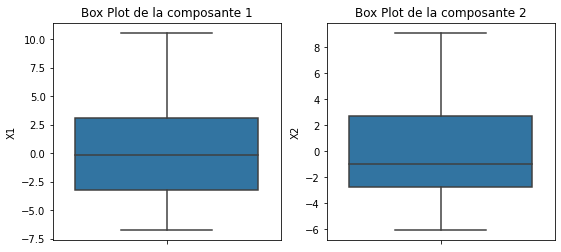

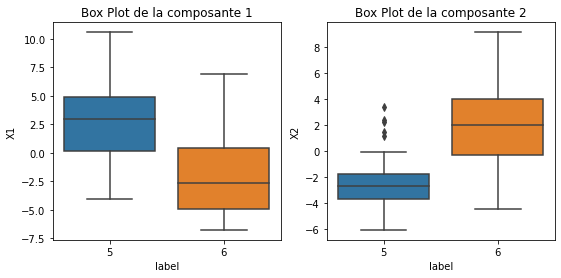

In [28]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.title("Box Plot de la composante 1")
sns.boxplot(df,y="X1")

plt.subplot(1,2,2)
plt.title("Box Plot de la composante 2")
sns.boxplot(df,y="X2")
plt.show()

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.title("Box Plot de la composante 1")
sns.boxplot(df,y="X1",x="label")

plt.subplot(1,2,2)
plt.title("Box Plot de la composante 2")
sns.boxplot(df,y="X2",x="label")
plt.show()

df.label = df.label.apply(lambda x: int(x+5))

Avec le box plot, on remarque que la première composante principale sépare plutôt bien les données.

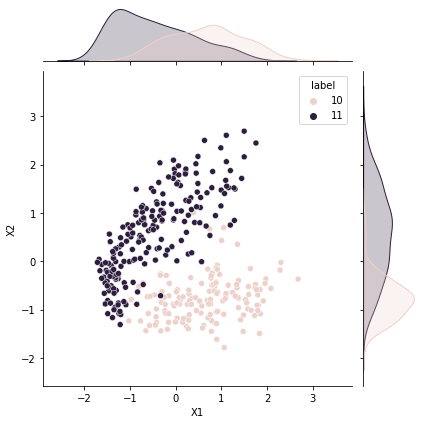

In [29]:
df.X1/=df.X1.std()
df.X2/=df.X2.std()
sns.jointplot(df,x="X1",y="X2", hue="label")
plt.show()

On voit bien ici qu'on peut séparer les données juste avec les 2 premières composantes principales.

# A 3 dimensions

Pour installer plotly, utilisez la commande suivante:

In [30]:
# pip install plotly

In [31]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='X3',
              color='label',opacity=0.7,color_discrete_sequence="Viridis")
fig.show()

# Etude et comparaison de performances d'un modèle de régression avec et sans PCA

In [32]:
centrage = np.tile(moy_train,(N_test,1))  #Facteur pour centrer les données

X_train_img = np.hstack((np.ones((N_train,1)),x_train_centre))
x_test_centre = x_test_brut - centrage
X_test_img = np.hstack((np.ones((N_test,1)),x_test_centre))

**Sans la PCA  (cf TP3)**

In [33]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_img,class_train.ravel())
t_pred_without_PCA = lr.predict(X_test_img)

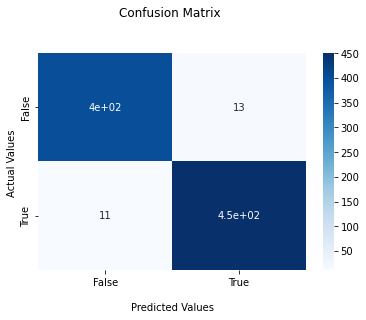

[[400  13]
 [ 11 451]]
La précision du modèle est de 0.9726


In [34]:
cM = confusion_matrix(t_pred_without_PCA,class_test.ravel())

ax = sns.heatmap(cM, annot=True, cmap='Blues')

ax.set_title(f'Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
plt.show()

#On ne voit pas très bien donc on affiche le numpy array

print(cM)
print(f"La précision du modèle est de {round(accuracy_score(t_pred_without_PCA,class_test.ravel()),4)}")

 **Avec PCA **

In [35]:
lr = LogisticRegression(max_iter=1000)

def regression_with_PCA(x_train_centre,x_test_centre,lr,class_train,class_test,U_t,nbComposantes = 125):
    N_train = np.size(x_train_centre,axis=0)
    N_test = np.size(x_test_centre,axis=0)
    
    Z_train =   U_t.T@ x_train_centre.T
    proj_train = Z_train[0:nbComposantes,:]
    
    Z_test =   U_t.T@ x_test_centre.T
    proj_test = Z_test[0:nbComposantes,:]
    
    X_train_img_proj = np.hstack((np.ones((N_train,1)),proj_train.T))
    X_test_img_proj = np.hstack((np.ones((N_test,1)),proj_test.T))
    
    
    lr.fit(X_train_img_proj,class_train.ravel())
    t_pred_with_PCA = lr.predict(X_test_img_proj)
    
    cM = confusion_matrix(t_pred_with_PCA,class_test.ravel())
    prec = accuracy_score(t_pred_with_PCA,class_test.ravel())
    return(cM,prec)

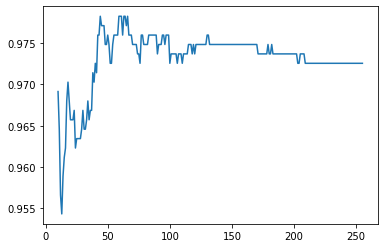

La précision maximale est atteinte avec 44 composantes et vaut 0.9783


In [36]:
Liste_nb_composants = range(10,len(U_t))
Liste_cM, Liste_prec = [],[]

for j in Liste_nb_composants:
    cM,prec = regression_with_PCA(x_train_centre,x_test_centre,lr,class_train,class_test,U_t,nbComposantes = j)
    Liste_cM.append(cM.ravel())
    Liste_prec.append(prec)

plt.plot(Liste_nb_composants,Liste_prec)
plt.show()

print(f"La précision maximale est atteinte avec {Liste_nb_composants[np.argmax(Liste_prec)]} composantes et vaut {round(np.max(Liste_prec),4)}")

**Conclusion**
On remarque que la précision en utilisant la PCA et un modèle de régression logistique combiné permet de gagner quelques milièmes de précision. 
De plus, alors que nous pensions devoir utiliser environ 125 composantes pour garder suffisamment d'informations, on remarque que 44 composantes suffisent.

Cette augmentation n'est clairement pas significative. Cependant, on peut imaginer que cette méthode serait plus efficace en très très grande dimensions.
La précision diminue quand le nombre de composantes augmente trop : 

En prenant beaucoup de composantes principales, le bruit fini pas ne plus être négligeable et l'apport d'informations de ces composantes perturbe plus le modèle qu'autre chose.

--> En effet la valeur des valeurs propres diminue très vite (cf graphique des valeurs propres plus haut).

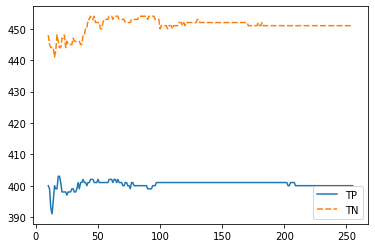

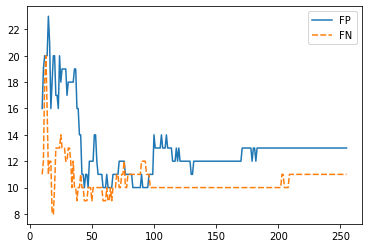

In [37]:
Confusion = pd.DataFrame(Liste_cM,columns=["TP","FP","FN","TN"],index=Liste_nb_composants)
plt.figure()
sns.lineplot( data=Confusion[["TP","TN"]])
plt.legend()
plt.show()
plt.figure()
sns.lineplot( data=Confusion[["FP","FN"]])
plt.legend()
plt.show()



On remarque qu'il y a une diminution des faux positifs et faux négatifs tandis qu'il y a un faible augmentation des vrai positifs et vrai négatifs.

## Beyong this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
